$\textbf{State of Art}$

I Variational Quantum Algorithms (VQA) sono un approccio computazionale applicabile a molte tipologie di problemi. Tuttavia, al crescere della dimensione del circuito si incontra una concentrazione esponenziale della funzione di perdita attorno alle soluzioni, fenomeno noto come Barren Plateu (BP).

Studi recenti hanno collegato la presenza del BP a circuiti unitari, tramite formalismi di Lie. Tuttavia, i risultati ottenuti non sono generalizzabili al caso in cui rumore e operazioni unitarie convivono.

Recentemente sono usciti nuovi studi, che hanno introdotto una notazione e teoria a matrici non negative per poter descrivere l'andamento del BP e dei VQA.
Il lavoro di questo Notebook vuole introdurre i VQA e spiegare in maniera accessibile lo studio 'Estimates of loss function concentration in noisy parametrized quantum circuits'.

Inoltre, il notebook fornirà un esposizione dei risultati numerici ottenuti sulla falsa riga dello studio sopracitato.

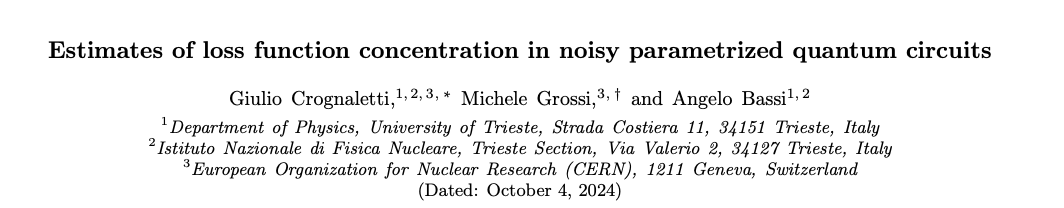

In [ ]:
from IPython.display import Image, display

imagine = "/Users/sebastianopian/Documents/Uni/Magistrale/Qc/QC.exam-1/Img/Screenshot 2025-02-22 alle 12.50.24.png"

display(Image(filename=imagine, width=600, height=400))

$\textbf{Circuiti quantistici parametrizzati (PQC) }$

I circuiti quantistici parametrizzati (PQC) sono utilizzati in algoritmi ibridi quantistici-classici per risolvere problemi computazionali. Sono fondamentali in applicazioni moderne come gli Algoritmi Quantistici Variazionali (VQA), poiché gestiscono meglio gli errori.

Le componenti principali dei VQA includono porte quantistiche parametrizzate e un ottimizzatore classico che regola i parametri per minimizzare o massimizzare una funzione obiettivo. Gli algoritmi VQA funzionano in modo iterativo, alternando elaborazione quantistica e classica, e la scelta dell'ansatz influisce sull'ottimizzazione.

Le funzioni di costo traducono i parametri quantistici in valori reali, mentre l'ottimizzatore cerca i minimi su una ipersuperficie definita da:

$$C(θ)=∑_kf_k(Tr(O_kρ_k(θ)))$$

$\textbf{QML (Quantum Machine Learning)}$

Le reti neurali quantistiche (QNN) uniscono elementi classici e quantistici, caricando dati in uno stato quantistico e elaborandoli con porte parametrizzate. L'output viene misurato e utilizzato in una funzione di perdita per addestrare i pesi tramite backpropagation.

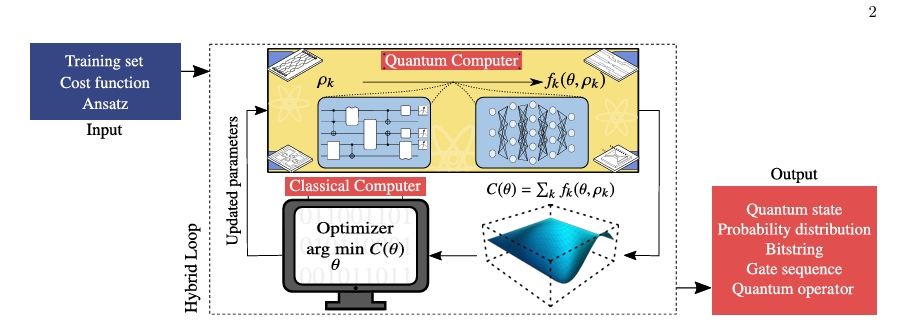

In [ ]:
from IPython.display import Image, display

image5 = "Img/Screenshot_23-1-2025_104642_.jpeg"

display(Image(filename=image5, width=600, height=400))

### Barren Plateau

Il fenomeno del *barren plateau* si verifica nei circuiti quantistici parametrizzati (PQC) quando il gradiente della funzione di costo tendono ad annullarsi esponenzialmente all'aumentare del numero di qubit. Questo rende difficile l'addestramento degli algoritmi quantistici variazionali, poiché la probabilità che il gradiente lungo una direzione significativa sia diverso da zero diminuisce rapidamente con l'aumentare dei qubit.


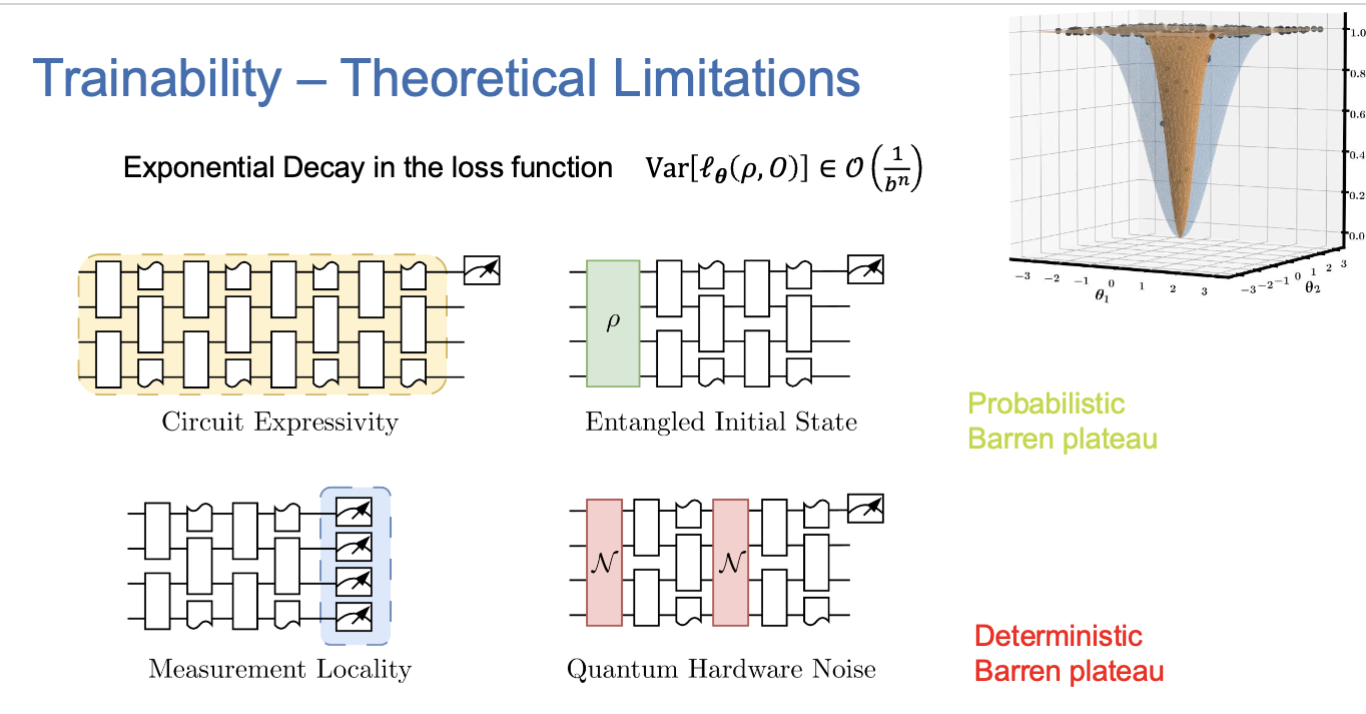

In [ ]:
image1 = "Img/Screenshot 2025-01-23 alle 11.32.53.png"
display(Image(filename=image1, width=500, height=400))

# Settings

Dato uno spazio di Hilbert di più qbit, su cui agiscono gate quantistici, è naturale dividerlo in $ \textit{H} = \otimes_{m} H_m $, con $ \text{dim}(\mathcal{H}) = \prod_{m} \text{dim}(\mathcal{H}_m) $. Con $ \mathcal{H}_m $ indichiamo un Q-bit o un gruppo di qbit e con $ \Phi_{\vec{\theta}} $ il canale quantistico (il circuito) che agisce sui Q-bit. La divisione viene fatta sulla nozione di località, che sarà approfondita più avanti.

La funzione di costo che viene minimizzata è $ \mathcal{L}_{\rho, k} = \text{Tr}[\Phi(\rho)H] $, con $ H $ osservabile da determinare. La sua utilità sta nel fatto che il BP può essere visto dalla varianza di $ \mathcal{L}: \textbf{V}_{\rho,H}(\theta) $. Nello specifico, c'è un BP se $ \textbf{V} \propto O(e^{-\beta n}) $ con $ n $ numero di QBIT. Questa funzione di costo ci permette di escludere molti casi in cui nasce BP.

In generale, lo spazio $ H $ può essere suddiviso in sottosistemi locali. Questa suddivisione di $ H $ induce una corrispondente partizione dello spazio $ B $ degli operatori su $ H $. Gli operatori in $ B $ vengono raggruppati in sottospazi $ B_\kappa $, ciascuno identificato da un vettore binario $ \kappa $ (con $ \kappa \in \{0, 1\}^M $), che indica su quali sottosistemi locali gli operatori agiscono trivialmente e su quali non (per ogni sottospazio non triviale $ \kappa_m = 1 $).

# Varianza

$ L $ è il numero dei layers. $ E_{\theta}\{.\} $ rappresenta il valore di aspettazione rispetto al parametro $ \theta $. Vale: $ E_{\theta}(\text{Tr}[\mathcal{U}_{\theta}(\rho)H]^2) = (l_{\rho},l_H) $. Dunque, termini di località diversa non contribuiscono insieme alla varianza, ma si sommano semplicemente. In generale: $ E_{\theta}(\text{Tr}[\Phi_{\theta}(\rho)H]^2) = (l_{\rho}, \prod_{l=1}^{L}T_l l_H) $, dunque:

$$
\textbf{V}_{\rho,H}^L = (l_{\rho}, \prod_{l=1}^{L}T_l l_H) - \frac{\text{Tr}[H]^2}{d^2}.
$$

Questa formula è inutilizzabile per grandi profondità a causa della sua complessità computazionale; ciò nondimeno sarà usata per ricavare il limite a profondità grandi.

Per circuiti profondi, il contributo degli autovalori $T_l$ diventa dominante.
Considereremo circuiti dove $\mathcal{E_l = E}$ e dove tutti gli osservabili H hanno traccia nulla, in modo che il secondo termine della varianza sia uguale a zero e che scompaia la sommatoria in favore di L.


$$\textbf{V}_{\rho,H}^L = (l_{\rho},\prod^L T_l l_H)$$

Dove $T_l$ è la matrice TLM del gate $𝛆_l †$

Se $L \rightarrow \infty $,

$$V_\infty^{\rho,H} = \sum_z (\ell \rho_z, w_z)(\ell_H)_z + (\ell \rho_z, w_z)(A \ell_H)_z$$
Dove $w_z$ è autovalore destro di $T_z$.

In generale, non è detto che la varianza converga ad un valore ma almeno rimane limitata. Nel lavoro, la convergenza della varianza sarà studiata dalla limitazione:

$$
\left| V^l_{\rho, H} - V^\infty_{\rho, H} \right| \in O\left(e^{-\beta L }\|H\|_2^2\right)
$$

Questo mette in evidenza come alcuni sottospazi si comportano da attrattori per la varianza. A è la matrice di assorbimento che quantifica il contributo di questi termini (non negativi).

Tanto più grande è il valore di A sullo spazio vettoriale, tanto più grande è il centramento tra i vari canali quantistici dunque tanto piu grandi sono i sottospazi essenziali.

# NOISE NON UNITALE


Adesso prendiamo in considerazione circuiti quantistici affetti da noise non unitale, come per esempio un rumore depolarizzante.
 Consideriamo $\mathcal{E}_c(\rho) = (1-p)\mathcal{E}(\rho) + p\tilde{\rho}$ dove  $\tilde{\rho}$ è uno stato arbitrario, E è un canale unitario che rappresenta l'entanglement, p l'errore. Possiamo pensare a $\Phi(\rho)= (1-p)\rho + p\tilde{\rho}$.


$$V_{\inf}^{\rho,H} \geq   p^2(l_{\tilde{\rho}}(I-(1-p)^2T)l_H)$$

e se T è un proiettore,

$$V_{\inf}^{\rho,H} \geq (p/(2-p))(l_{\tilde{\rho}}, Tl_H) + p^2(l_{\tilde{\rho}}, l_H)$$

Notiamo che è scomparsa la dipendenza dallo stato iniziale. Solo i layer dopo un certo l contribuiscono sensibilmente alla varianza.

In particolare, possiamo considerare due limiti contrapposti. Nel primo il noise entangla lentamente lo stato, a quel punto il primo termine è dominante. D'altra parte se il noise entangla velocemente lo stato è il secondo termine ad essre dominante.

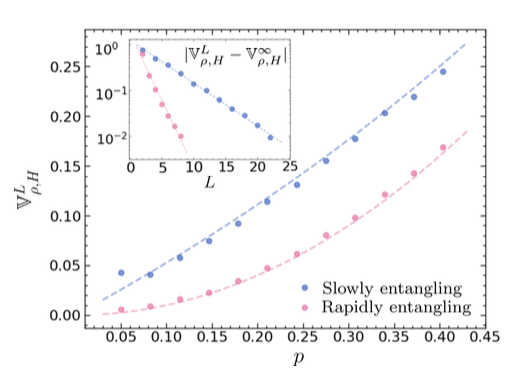

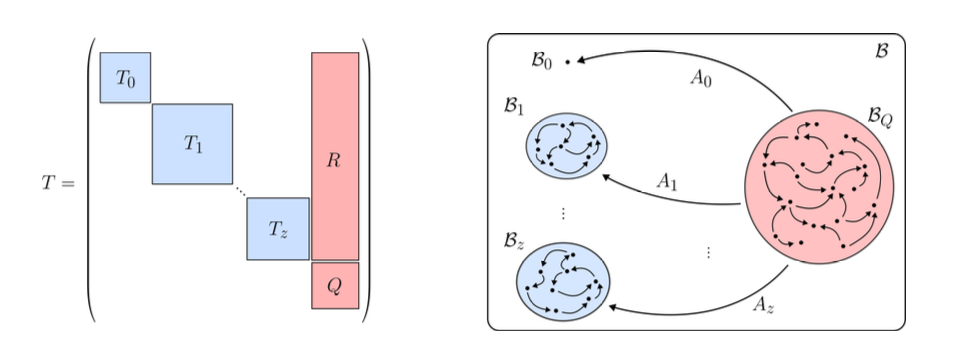

In [ ]:
from IPython.display import Image, display

# Percorso dell'immagine
image3 = "Img/Screenshot 2025-01-22 alle 11.21.30.png"
image4 = 'Img/Screenshot 2025-01-22 alle 16.47.42.png'

display(Image(filename=image4, width=500, height=400))
display(Image(filename=image3, width=500, height=400))

# SCELTA DEL SDR PER RISULTATI NUMERICI

Per simulare il rumore entangling, sono stati mandati con probabilità p lo stato nel GHZ (stato di massimo entanglement):
$\tilde{\rho} = \frac{(\vert 0 \rangle^{\otimes n} + \vert 1 \rangle^{\otimes n})(\langle 0 \vert^{\otimes n} + \langle 1 \vert^{\otimes n})}{2^n}$.
Lo stato iniziale è fissato come $\rho = (\vert 0 \rangle \langle 0 \vert)^{\otimes n}$ a cui vengono applicate una serie di rotazioni su X e Z casuali.

Il canale considerato è della forma $E_c = N \circ E$, dove:
$$E_c(\rho) = (1-p)E(\rho) + p\tilde{\rho},$$

L'utilità è che lo stato GHZ può essere rappresentato da somme di matrici di Pauli rendendolo facilmente computabile.

La parte entangling è rappresentata in Fig. 4. Sebbene il numero di strati $L$ necessari per raggiungere la convergenza a $V^\infty_{\rho, H}$ sia logaritmico, la velocità di mescolamento dipende dalla parte entangling. Per questo motivo, $L = 8$ strati sono sufficienti nel caso di entanglement rapido, mentre $L = 20$ sono necessari per l'entanglement lento.

L'osservabile è fissato come:
$$
H = h \sum_{k=1}^n Z_k \otimes Z_{k+1},
$$

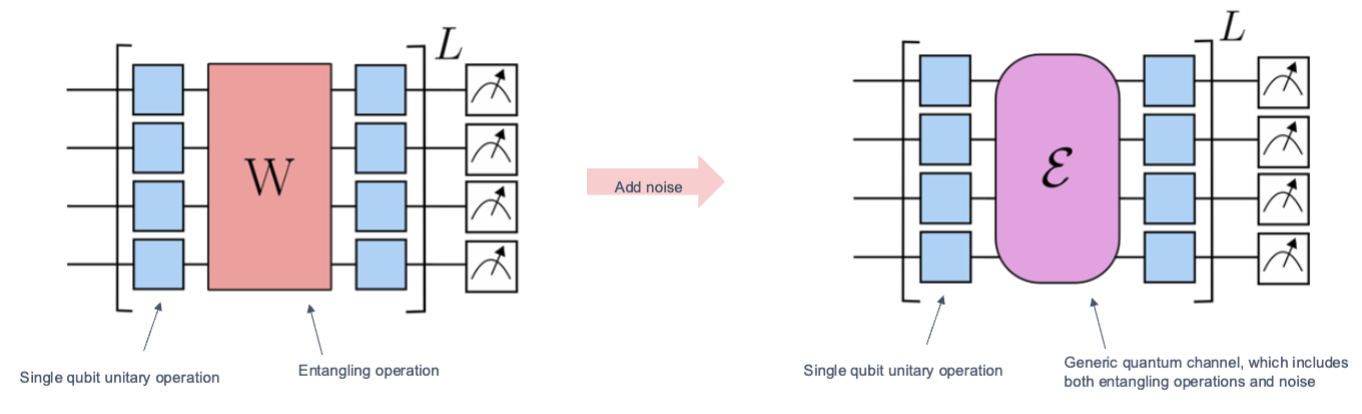

In [ ]:
image2 = "Img/Screenshot 2025-01-23 alle 11.35.04.png"
display(Image(filename=image2, width=300, height=200))

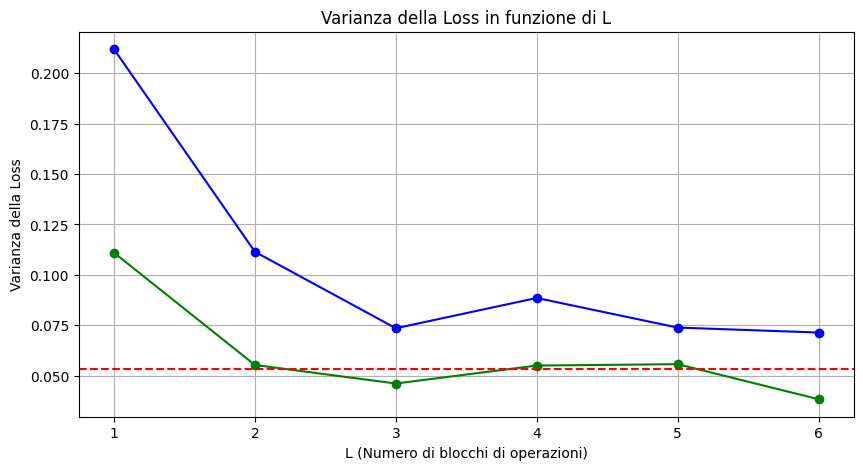

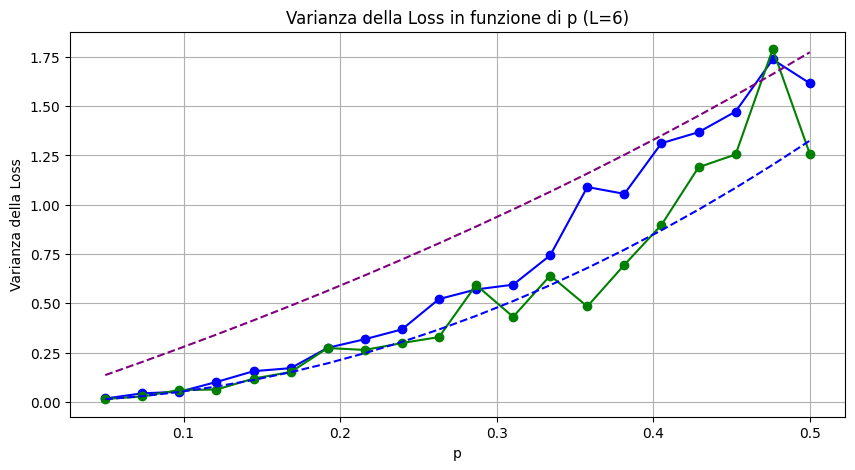

In [ ]:
import qiskit as qc
from qiskit_aer import Aer
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix, SparsePauliOp
import matplotlib.pyplot as plt
import itertools
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.sparse.csgraph import connected_components
from functools import reduce

# Parametri
n = 4  # Numero di qubit
shots = 100  # Numero di esecuzioni
L_values_range = 6  # Numero massimo di blocchi di operazioni
p = 0.1  # Probabilità di applicare lo stato GHZ
h = 1  # Coefficiente nell'Hamiltoniano

# Funzione per generare parametri casuali
def generate_random_parameters(n):
    return 2 * np.pi * np.random.rand(2 * n)

# Funzione per mescolare rho con lo stato GHZ
def rho_noise(p, rho):
    rho_ghz = np.zeros_like(rho)
    rho_ghz[0, 0] = 0.5
    rho_ghz[-1, -1] = 0.5
    rho_ghz[0, -1] = 0.5
    rho_ghz[-1, 0] = 0.5
    return p * rho + (1 - p) * rho_ghz

# Funzione per costruire il circuito e applicare il rumore
def circuit_with_noise(n, p, L):

    circuit = QuantumCircuit(n)
    rho = DensityMatrix.from_instruction(circuit).data  # Matrice densità iniziale

    for _ in range(L):
        # Applica rotazioni casuali
        parameters = generate_random_parameters(n)
        for i in range(n):
            circuit.rx(parameters[2 * i], i)
            circuit.rz(parameters[2 * i + 1], i)
        # Applica i CNOT e gli swap
        circuit.cx(0, 1)
        circuit.cx(3, 2)
        circuit.swap(0, 2)
        circuit.swap(1, 3)

        # Evoluzione dello stato
        rho = DensityMatrix.from_instruction(circuit)
        rho = rho_noise(p, rho)
    return rho

def circuit_with_noise_slow(n, p, L):

    circuit = QuantumCircuit(n)
    rho1 = DensityMatrix.from_instruction(circuit).data

    for _ in range(L):
        # Applica rotazioni casuali
        parameters = generate_random_parameters(n)
        for i in range(n):
            circuit.rx(parameters[2 * i], i)
            circuit.rz(parameters[2 * i + 1], i)
        # Applica i CNOT e gli swap
        circuit.crx(np.pi / 20, 0, 1)
        circuit.crx(np.pi / 20, 1, 2)
        circuit.crx(np.pi / 20, 2, 3)

        # Evoluzione dello stato
        rho1 = DensityMatrix.from_instruction(circuit)
        rho1 = rho_noise(p, rho1)
    return rho1

# Creazione dell'Hamiltoniano W
pauli_strings = []
coefficients = []

for k in range(n-1):
     # Coefficiente del termine
    coefficients.append(h *(2**(n/2)))
    # Stringa di Pauli per Z_k ⊗ Z_{k+1}
    pauli_string = ['I'] * n
    pauli_string[k] = 'Z'  # Z_k
    pauli_string[(k + 1)] = 'Z'  # Z_{k+1} (periodico)
    pauli_strings.append("".join(pauli_string))

# Creazione dell'Hamiltoniano come SparsePauliOp
W = SparsePauliOp(pauli_strings, coeffs=np.array(coefficients))

# Lista per memorizzare i valori di L
L_values_all = {L: [] for L in range(1, L_values_range + 1)}
L_values_all1 = {L: [] for L in range(1, L_values_range + 1)}

for L in range(1, L_values_range + 1):
    L_values_shots = []
    L_values_shots1 = []

    for _ in range(shots):
        rho = circuit_with_noise(n, p, L)  # Stato con rumore
        W_matrix = W.to_matrix()
        L_value = np.trace(W_matrix @ rho.data)  # Loss
        L_values_shots.append(L_value)

        rho1 = circuit_with_noise_slow(n, p, L)  # Stato con rumore
        W_matrix = W.to_matrix()
        L_value1 = np.trace(W_matrix @ rho1.data)  # Loss
        L_values_shots1.append(L_value1)

    L_values_all[L] = L_values_shots
    L_values_all1[L] = L_values_shots1

L_means = {L: np.mean(L_values_all[L]) for L in range(1, L_values_range + 1)}
L_variances = {L: np.var(L_values_all[L]) for L in range(1, L_values_range + 1)}
L_means1 = {L: np.mean(L_values_all1[L]) for L in range(1, L_values_range + 1)}
L_variances1 = {L: np.var(L_values_all1[L]) for L in range(1, L_values_range + 1)}

# Plot della varianza in funzione di L
L_range = list(L_variances.keys())
var_values = list(L_variances.values())
L_values = list(L_means.values())
var_values1 = list(L_variances1.values())
L_values1 = list(L_means1.values())
var_values1 = np.array(var_values1, dtype=float)

plt.figure(figsize=(10, 5))
plt.plot(L_range, var_values, marker='o', linestyle='-', color='b')
plt.plot(L_range, var_values1, marker='o', linestyle='-', color='g')
plt.xlabel('L (Numero di blocchi di operazioni)')
plt.ylabel('Varianza della Loss')
plt.title('Varianza della Loss in funzione di L')
plt.axhline(y=0.0533, color='r', linestyle='--', label="V_inf")
plt.grid(True)
plt.show()

p_values = np.linspace(0.05, 0.5, 20)

for p in p_values:
    L_values_shots = []
    L_values_shots1 = []
    for _ in range(shots):
        rho = circuit_with_noise(n, p, L_values_range)
        rho1=circuit_with_noise_slow(n,p, L_values_range)  # Stato con rumore
        W_matrix = W.to_matrix()
        L_value = np.trace(W_matrix @ rho.data)
        L_value1 = np.trace(W_matrix @ rho1.data)  # Loss
        L_values_shots.append(L_value)
        L_values_shots1.append(L_value1)
    L_values_all[p] = L_values_shots
    L_values_all1[p] = L_values_shots1

L_means = {p: np.mean(L_values_all[p]) for p in p_values}
L_variances = {p: np.var(L_values_all[p]) for p in p_values}
L_means1 = {p: np.mean(L_values_all1[p]) for p in p_values}
L_variances1 = {p: np.var(L_values_all1[p]) for p in p_values}

var_values = list(L_variances.values())
L_values = list(L_means.values())
var_values1 = list(L_variances1.values())
L_values1 = list(L_means1.values())
var_values1 = np.array(var_values1, dtype=float)

y = 5.3*p_values**2
z= 0.04*p_values**2 + (p_values/(2-p_values))*5.29

# Plot della varianza in funzione di p
plt.figure(figsize=(10, 5))
plt.plot(p_values, var_values, marker='o', linestyle='-', color='b')
plt.plot(p_values, var_values1, marker='o', linestyle='-', color='g')
plt.plot(p_values, y, marker='', linestyle='--', color='b')
plt.plot(p_values, z, marker='', linestyle='--', color='purple')
plt.xlabel('p')
plt.ylabel('Varianza della Loss')
plt.title(f'Varianza della Loss in funzione di p (L={L_values_range})')
plt.grid(True)
plt.show()

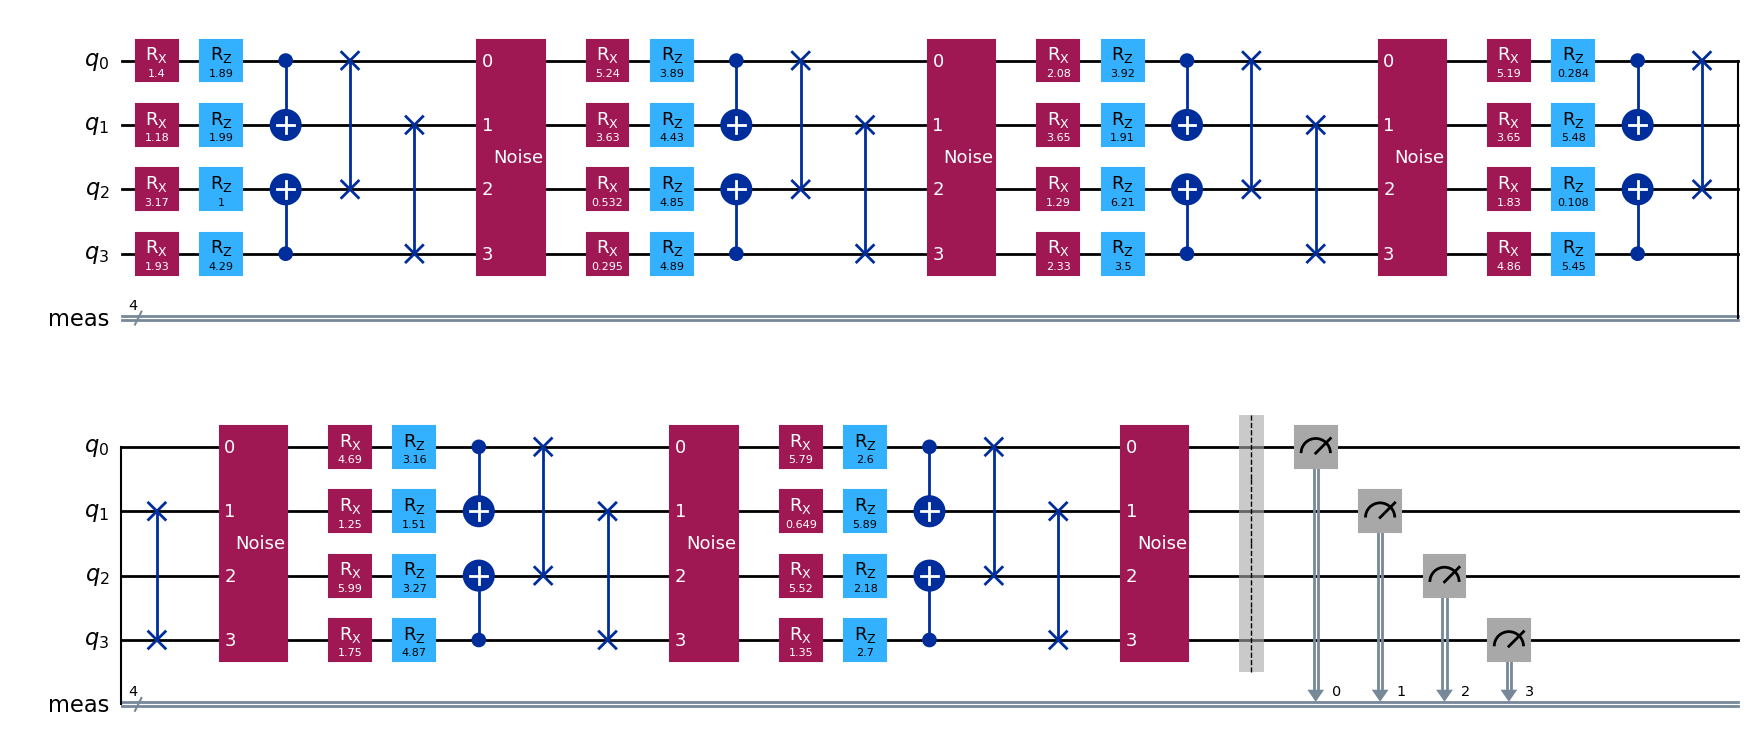

In [ ]:
from qiskit.circuit import Gate

L_final=6
noise_gate = Gate(name="Noise", num_qubits=n, params=[])
circuit = QuantumCircuit(n)
rho = DensityMatrix.from_instruction(circuit).data  # Matrice densità iniziale

for _ in range(L_final):
        # Applica rotazioni casuali
    parameters = generate_random_parameters(n)
    for i in range(n):
        circuit.rx(parameters[2 * i], i)
        circuit.rz(parameters[2 * i + 1], i)
        # Applica i CNOT e gli swap
    circuit.cx(0, 1)
    circuit.cx(3, 2)
    circuit.swap(0, 2)
    circuit.swap(1, 3)
    circuit.append(noise_gate, range(n))

circuit.measure_all()

circuit.draw('mpl')

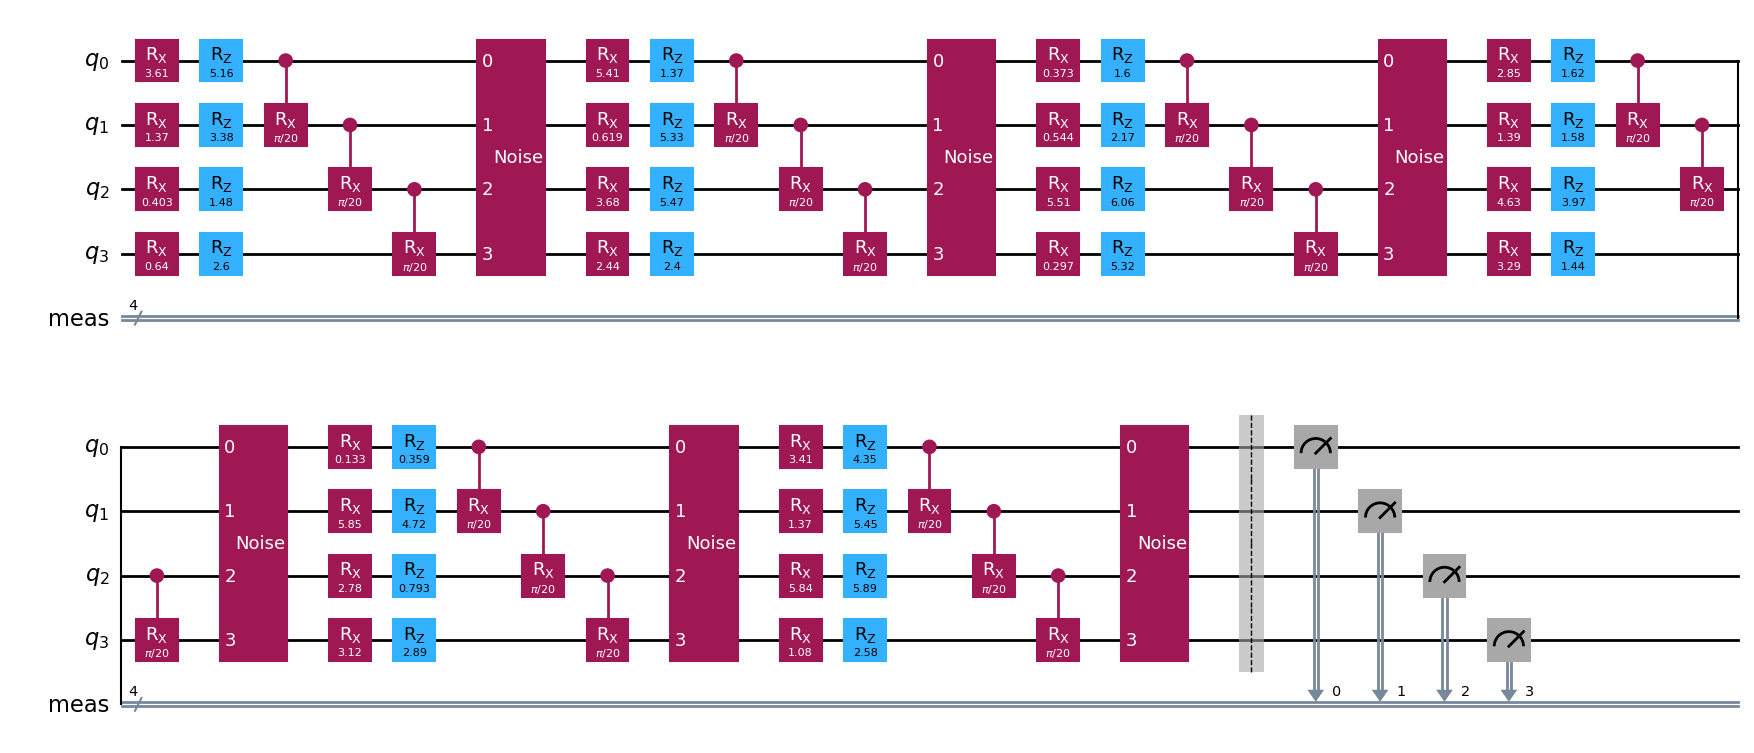

In [ ]:
from qiskit.circuit import Gate
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix

n = 4  # Numero di qubit
L_final = 6
noise_gate = Gate(name="Noise", num_qubits=n, params=[])

circuit = QuantumCircuit(n)
rho = DensityMatrix.from_instruction(circuit).data  # Matrice densità iniziale

for _ in range(L_final):
    # Applica rotazioni casuali
    parameters = 2 * np.pi * np.random.rand(2 * n)
    for i in range(n):
        circuit.rx(parameters[2 * i], i)
        circuit.rz(parameters[2 * i + 1], i)

    # Controllo rotazione RX(π/10)
    circuit.crx(np.pi / 20, 0, 1)
    circuit.crx(np.pi / 20, 1, 2)
    circuit.crx(np.pi / 20, 2, 3)

    # Aggiunta del rumore
    circuit.append(noise_gate, range(n))

circuit.measure_all()

# Disegna il circuito
circuit.draw('mpl')

Lo spazio $ B $ è scomposto come somma diretta:
$$
B = \bigoplus_{\kappa \in \{0,1\}^M} B_\kappa.
$$
La dimensione di ciascun sottospazio $ B_\kappa $ è data da:
$ d_\kappa = \prod_m (d_m^2 - 1)^{\kappa_m} $, dove $ d_m $ rappresenta la dimensione del sottosistema $ H_m $. Il caso speciale $ \kappa = 0 $ corrisponde a operatori triviali.

In pratica, dato che gli operatori e gli spazi di Hilbert dei Qbit vivono nella stessa dimensione, possiamo dividere lo spazio di Hilbert in base a come gli operatori agiscono su di esso. Se, per esempio, un operatore $ A $ agisce trivialmente sul primo Qbit e non trivialmente sul secondo, lo indicheremo con la stringa (10).

Questa divisione ha a che vedere con la teoria dei grafi. Come vedremo più avanti, gli operatori faranno nascere dei sottospazi isolati nello spazio di Hilbert. Ovvero, uno stato che nasce in un sottospazio resterà in quel sottospazio anche dopo l'applicazione lineare.

Allo stesso tempo, osserveremo la nascita di sottospazi che si disperdono. Ovvero, le applicazioni faranno nascere dei sottospazi non isolati, che porteranno i propri elementi in sottospazi isolati. Ovvero, i sottospazi isolati assorbiranno informazione dai sottospazi dispersivi.

Questa osservazione relativa alla dispersione e all'assorbimento di stati, dunque di informazioni, è alla base di questo lavoro, in quanto l'assorbimento da una parte all'altra del circuito è una causa importante dell'aumento della varianza.

# Transfer Matrix

Un operatore $ A \in B $ si dice $ \kappa $-locale se appartiene a $ B_\kappa $. A ciascun operatore si associa un vettore di località $ \ell_A \in \mathbb{R}^{2^M} $, che descrive quanto l'operatore è distribuito nei vari sottospazi $ B_\kappa $. Il vettore di località $ \ell_A $ è definito come un vettore di dimensione pari al numero di sottospazi in cui lo spazio $ B $ è suddiviso. Ogni componente $ (\ell_A)_\kappa $ rappresenta la proiezione dell'operatore $ A $ sul sottospazio $ B_\kappa $. Questa formula misura la somma dei quadrati delle proiezioni dell'operatore $ A $ sugli elementi della base $ \{B_j\}_j $, normalizzata rispetto alla dimensione del sottospazio. Questo vettore è calcolato utilizzando una base ortonormale hermitiana $ \{B_j\}_j $ di $ B_\kappa $, e gli elementi di $ \ell_A $ sono definiti come:
$$
(\ell_A)_\kappa = \frac{\sum_{j=1}^{d_\kappa} \text{Tr}[B_j A]^2}{d_\kappa}.
$$

Se $ A $ è un operatore locale, il vettore di località assume la forma più semplice:  $ (\ell_A)_\lambda = \delta_{\kappa,\lambda} \|A\|_2 $.

A questo punto siamo interessati a capire quando un operatore lineare che agisce su $ B $ preserva la località dello spazio, cioè quanto due sottospazi di $ B $ sono messi in comunicazione da un operatore lineare. Questo è rappresentato dalla matrice di trasferimento di località $ T $, i cui elementi sono definiti come:
$$
T_{\kappa,\lambda} = \frac{1}{d_\kappa} \sum_{j=1}^{d_\kappa} (\ell_{\Lambda(B_j)})_\lambda,
$$
dove $ \ell_{\Lambda(B_j)} $ è il vettore di località associato all'immagine di $ B_j $ sotto $ \Lambda $.

La matrice $ T $ può essere organizzata in blocchi per evidenziare meglio le interazioni tra gruppi di sottospazi. Ad esempio, se i sottospazi $ B_\kappa $ sono raggruppati in modo gerarchico, la matrice $ T $ può essere scritta come:
$$
T =
\begin{bmatrix}
T^{(1,1)} & 0 & \cdots & T^{(1,n)} \\
0 & T^{(2,2)} & \cdots & T^{(2,n)} \\
\vdots    & \vdots    & \ddots & \vdots    \\
0 & 0 & \cdots & T^{(n,n)}
\end{bmatrix},
$$
dove i blocchi diagonali $ T^{(i,i)} $ rappresentano la preservazione della località all'interno di ciascun gruppo di sottospazi, mentre l'ultima colonna rappresenta la nascita del fenomeno di assorbimento.

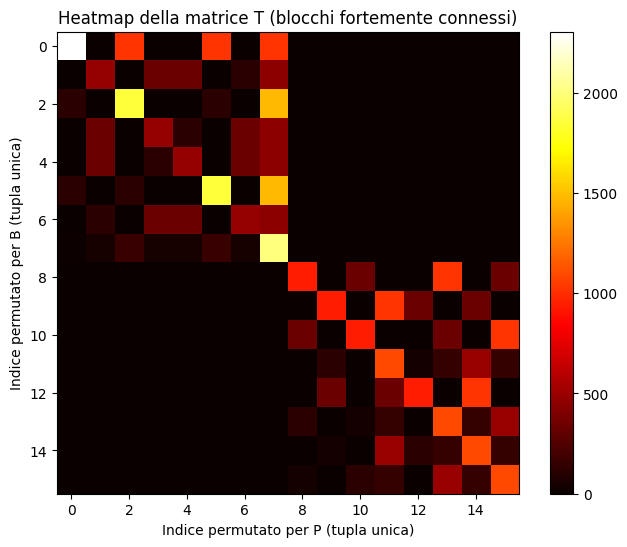

Mappatura della permutazione (nuovo indice -> indice originale):
{0: 0, 1: 3, 2: 5, 3: 6, 4: 9, 5: 10, 6: 12, 7: 15, 8: 1, 9: 2, 10: 4, 11: 7, 12: 8, 13: 11, 14: 13, 15: 14}


In [ ]:
from inspect import trace
import numpy as np
import itertools
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.sparse.csgraph import connected_components
import qiskit as qc
from qiskit_aer import Aer
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix, SparsePauliOp

n = 4  # Numero di qubit

# 2. Genera tutti i possibili prodotti tensore e definisce la "binary tuple"
tensor_products = []
for combination in itertools.product(matrix_labels, repeat=n):
    tensor = pauli_matrices[combination[0]]
    for label in combination[1:]:
        tensor = np.kron(tensor, pauli_matrices[label])
    binary_tuple = tuple(1 if label != 'I' else 0 for label in combination)
    tensor_products.append((binary_tuple, tensor))

# Ordinamento in base al valore della tuple (facoltativo)
tensor_products.sort(key=lambda item: sum(bit * (2**i) for i, bit in enumerate(item[0])))

# Raggruppa i tensori in base alla binary tuple
groups = defaultdict(list)
for binary_tuple, tensor in tensor_products:
    groups[binary_tuple].append(tensor)

# Lista ordinata delle tuple uniche e definizione del numero J di gruppi
unique_tuples = sorted(groups.keys(), key=lambda tup: sum(bit * (2**i) for i, bit in enumerate(tup)))
J = len(unique_tuples)

############_-------------------------------------------------
# 3. Definizione della matrice H (in questo caso l'identità 4x4)
h=1
pauli_strings = []
coefficients = []

for k in range(n-1):
     # Coefficiente del termine
    coefficients.append(h *(2**(n/2)))
    # Stringa di Pauli per Z_k ⊗ Z_{k+1}
    pauli_string = ['I'] * n
    pauli_string[k] = 'Z'  # Z_k
    pauli_string[(k + 1)] = 'Z'  # Z_{k+1} (periodico)
    pauli_strings.append("".join(pauli_string))

# Creazione dell'Hamiltoniano come SparsePauliOp
W = SparsePauliOp(pauli_strings, coeffs=np.array(coefficients))
W_matrix = W.to_matrix()
H=W_matrix

#-----------------------------------

# 4 Costruzione della matrice T e di l:
# Per ciascun gruppo j (per tensori B) e per ciascun gruppo k (per tensori P)
# si somma (con normalizzazione) il contributo: (trace(H† B H P))^2.

T = np.zeros((J, J), dtype=complex)




for j_idx, tup_j in enumerate(unique_tuples):
    LT_vec = np.zeros(J, dtype=complex)
    # Calcola il fattore di normalizzazione per il gruppo B: per ogni '1' nella tuple si ha un fattore 3
    norm_factor_B = 3 ** (sum(tup_j))

    # Per ogni tensore B nel gruppo j
    for B in groups[tup_j]:
        # Ciclo sui gruppi per P (indice k)
        for k_idx, tup_k in enumerate(unique_tuples):
            trace_sum = 0
            # Fattore di normalizzazione per il gruppo P
            norm_factor_P = 3 ** (sum(tup_k))
            for P in groups[tup_k]:
                trace_val = np.trace(H.conj().T @ B @ H @ P)
                # Normalizzazione: il contributo viene diviso per il prodotto dei fattori per B e per P
                trace_sum += (trace_val**2) / (norm_factor_B )
            LT_vec[k_idx] += trace_sum
    T[j_idx, :] = LT_vec



# 5. Diagonalizzazione a blocchi fortemente connessi tramite permutazioni
# Costruiamo una "matrice di connettività": consideriamo un arco tra i nodi i e j se |T[i,j]| > tol
tol = 1e-16
connectivity = (np.abs(T) > tol).astype(int)

# Trova i componenti connessi (trattando la matrice come grafo non diretto)
n_components, comp_labels = connected_components(connectivity, directed=False, connection='weak')

# La permutazione che raggruppa per componente è data da:
permutation = np.argsort(comp_labels)
# Riordiniamo T per ottenere una forma bloc-diagonale
T_perm = T[permutation, :][:, permutation]

# Salviamo la mappatura della permutazione: (nuovo indice -> indice originale)
perm_mapping = {new_idx: old_idx for new_idx, old_idx in enumerate(permutation)}

# 6. Plot della matrice T permutata come heatmap (si plottano i valori reali)
plt.figure(figsize=(8, 6))
plt.imshow(np.real(T_perm), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xlabel("Indice permutato per P (tupla unica)")
plt.ylabel("Indice permutato per B (tupla unica)")
plt.title("Heatmap della matrice T (blocchi fortemente connessi)")
plt.show()

# Salva (o stampa) la mappatura della permutazione
print("Mappatura della permutazione (nuovo indice -> indice originale):")
print(perm_mapping)

<ipython-input-63-289a75b008f6>:47: ComplexWarning: Casting complex values to real discards the imaginary part
  LC_vec[k_idx] += trace_sum


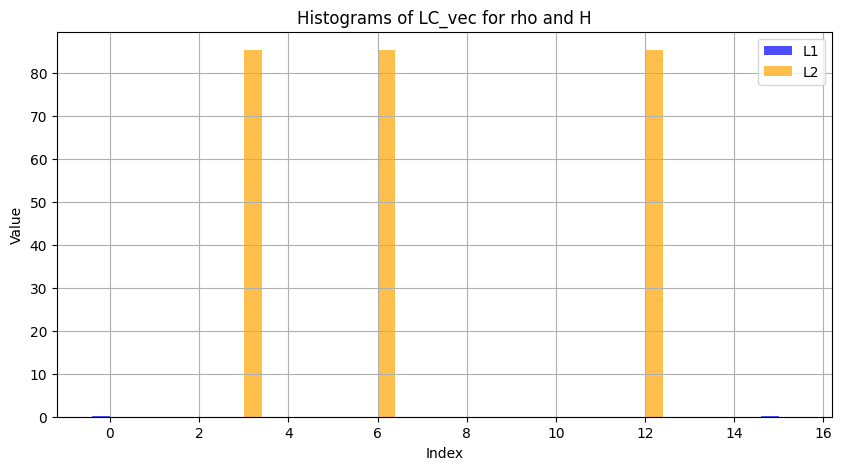

Varianza infinito= 0.05333333333333326
Varianza infinito in funzione di p (slow entangling)= p/(2-p) 5.333333333333326
Varianza infinito in funzione di p (rapid entangling)= p^2* 5.333333333333326


In [ ]:
LC_vec = np.zeros(len(unique_tuples))
n=4
import numpy as np
from qiskit.quantum_info import DensityMatrix, SparsePauliOp

def ghz_density_matrix(n):
    dim = 2 ** n  # Dimensione della matrice 2^n x 2^n
    rho_ghz = np.zeros((dim, dim), dtype=np.complex128)
    rho_ghz[0, 0] = 0.5
    rho_ghz[-1, -1] = 0.5
    rho_ghz[0, -1] = 0.5
    rho_ghz[-1, 0] = 0.5
    return rho_ghz

for k in range(n-1):
     # Coefficiente del termine
    coefficients.append(h *(2**(n/2)))
    # Stringa di Pauli per Z_k ⊗ Z_{k+1}
    pauli_string = ['I'] * n
    pauli_string[k] = 'Z'  # Z_k
    pauli_string[(k + 1)] = 'Z'  # Z_{k+1} (periodico)
    pauli_strings.append("".join(pauli_string))

def compute_LC_vec(AV):
    LC_vec = np.zeros(len(unique_tuples))
    for k_idx, tup_k in enumerate(unique_tuples):
        trace_sum = 0
        norm_factor_P = 3 ** (sum(tup_k))
        for P in groups[tup_k]:
            trace_val = np.trace(AV @ P)
            trace_sum += (trace_val**2) / np.sqrt(norm_factor_P)
        LC_vec[k_idx] += trace_sum
    return LC_vec


def compute_LC_vecNN(AV):
    LC_vec = np.zeros(len(unique_tuples))
    for k_idx, tup_k in enumerate(unique_tuples):
        trace_sum = 0
        norm_factor_P = 3 ** (sum(tup_k))
        for P in groups[tup_k]:
            trace_val = np.trace(AV @ P)
            trace_sum += (trace_val**2)
        LC_vec[k_idx] += trace_sum
    return LC_vec

def compute_LC_vecN(AV):
    LC_vec = np.zeros(len(unique_tuples))
    for k_idx, tup_k in enumerate(unique_tuples):
        trace_sum = 0
        norm_factor_P = 3 ** (sum(tup_k))
        for P in groups[tup_k]:
            trace_val = np.trace(AV @ P)
            trace_sum += (trace_val**2)
        LC_vec[k_idx] += trace_sum / norm_factor_P
    return LC_vec

def matrix_vector_product(T, L2):
    result = np.dot(T, L2)
    return result

def plot_LC_product(l1, l2):
    # Calcola il prodotto dei vettori
    a = l1 * l2
    np.save('LC_product.npy', a)

    # Inizializza una lista per i contributi normalizzati
    normalized_contributions = []

    # Ciclo attraverso le componenti del vettore e gli indici delle tuple
    for i, tup_j in enumerate(unique_tuples):
        normalized_value = a[i]
        normalized_contributions.append(normalized_value)

    # Crea un istogramma con barre numerate
    indices = np.arange(len(a))
    plt.bar(indices, a, alpha=0.7, color='blue')

    # Aggiungi le etichette sopra le barre
    for i, value in enumerate(a):
        plt.text(i, value, str(value), ha='center', va='bottom')

    plt.xlabel('Index')
    plt.ylabel('Product Value')
    plt.title('Bar Chart of Component-wise Product of LC_vec')
    plt.grid(True)
    plt.show()

    # Calcola la somma totale dei contributi normalizzati
    total_normalized_sum = np.sum(normalized_contributions)

    return a, total_normalized_sum

def plot_LC_product(l1, l2):
    # Calcola il prodotto dei vettori
    a = l1 * l2
    np.save('LC_product.npy', a)

    # Inizializza una lista per i contributi normalizzati
    normalized_contributions = []

    # Ciclo attraverso le componenti del vettore e gli indici delle tuple
    for i, tup_j in enumerate(unique_tuples):
        normalized_value = a[i]
        normalized_contributions.append(normalized_value)

    # Crea un istogramma con barre numerate
    indices = np.arange(len(a))
    plt.bar(indices, a, alpha=0.7, color='blue')

    # Aggiungi le etichette sopra le barre
    for i, value in enumerate(a):
        plt.text(i, value, str(value), ha='center', va='bottom')

    plt.xlabel('Index')
    plt.ylabel('Product Value')
    plt.title('Bar Chart of Component-wise Product of LC_vec')
    plt.grid(True)
    plt.show()

    # Calcola la somma totale dei contributi normalizzati
    total_normalized_sum = np.sum(normalized_contributions)

    return a, total_normalized_sum


#------------------------------------------------------
pauli_strings = []
coefficients = []

for k in range(n-1):
     # Coefficiente del termine
    coefficients.append(h *(2**(n/2)))
    # Stringa di Pauli per Z_k ⊗ Z_{k+1}
    pauli_string = ['I'] * n
    pauli_string[k] = 'Z'  # Z_k
    pauli_string[(k + 1)] = 'Z'  # Z_{k+1} (periodico)
    pauli_strings.append("".join(pauli_string))

h=1

# Creazione dell'Hamiltoniano come SparsePauliOp
W = SparsePauliOp(pauli_strings, coeffs=np.array(coefficients))
W_matrix = W.to_matrix()


#METTI H E RHO I VETTORI DA CALCOLARE LA LOC
H=W_matrix
rho=ghz_density_matrix(n)
#------____----_-___-__-___--___---__--__-_------------


#vecN calcola il vettore località dividendo le località per la loro dimensione, rendendole pronte per il prodotto scalare
#vecNN calcola il vettore località vero e proprio, qui calcolato per fare il prodotto con la matrice T
#la matrice T è la matrice LTM di H osservabile.

L1= compute_LC_vecN(rho)
L2 = compute_LC_vecNN(H)


#Qui calcoliamo la matrice Q, prodotto matrice vettore tra T(del gate entangler) e vettore località di H
Q = matrix_vector_product(T,L2)
a = L1 * Q
a = sum (a)




print("prodotto scalare lTl", a)




def plot_histograms(L1, Q):
    indices = np.arange(len(L1))
    width = 0.4
    plt.figure(figsize=(10, 5))
    plt.bar(indices - width/2, L1, width=width, label='L1', alpha=0.7, color='blue')
    plt.bar(indices + width/2, L2, width=width, label='L2', alpha=0.7, color='orange')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Histograms of LC_vec for rho and H')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_histograms(L1,Q)


# 6. Plot della matrice T permutata come heatmap (si plottano i valori reali)
plt.figure(figsize=(8, 6))
plt.imshow(np.real(T), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xlabel("Indice permutato per P (tupla unica)")
plt.ylabel("Indice permutato per B (tupla unica)")
plt.title("Heatmap della matrice T (blocchi fortemente connessi)")
plt.show()

# Salva (o stampa) la mappatura della permutazione
print("Mappatura della permutazione (nuovo indice -> indice originale):")
print(perm_mapping)





V =  0.01 * total_normalized_sum
print("Varianza infinito=", V)
print("Varianza infinito in funzione di p (slow entangling)= p/(2-p)", total_normalized_sum)
print("Varianza infinito in funzione di p (rapid entangling)= p^2*", total_normalized_sum)
